# This jupyter notebook is prepared  by Justin Mazor

# 1. Load Data and perform basic EDA 

## I. import libraries necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
import sklearn

## II.  import the data to a dataframe and show the count of rows and columns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jmazor/Machine_A4/main/hrdata3.csv')
print(df.shape)

(12977, 8)


## III. Show the top 5 and last 5 rows 

In [3]:
print(df)

       Unnamed: 0  enrollee_id  city_development_index  experience  \
0               1        29725                   0.776          15   
1               4          666                   0.767          21   
2               6        28806                   0.920           5   
3               7          402                   0.762          13   
4               8        27107                   0.920           7   
...           ...          ...                     ...         ...   
12972       19149          251                   0.920           9   
12973       19150        32313                   0.920          10   
12974       19152        29754                   0.920           7   
12975       19155        24576                   0.920          21   
12976       19156         5756                   0.802           0   

       company_size  last_new_job  training_hours  target  
0                 2             5              47     0.0  
1                 2             4      

## IV. Is there any null values on any column?

Presence of Null Values: False


<AxesSubplot:>

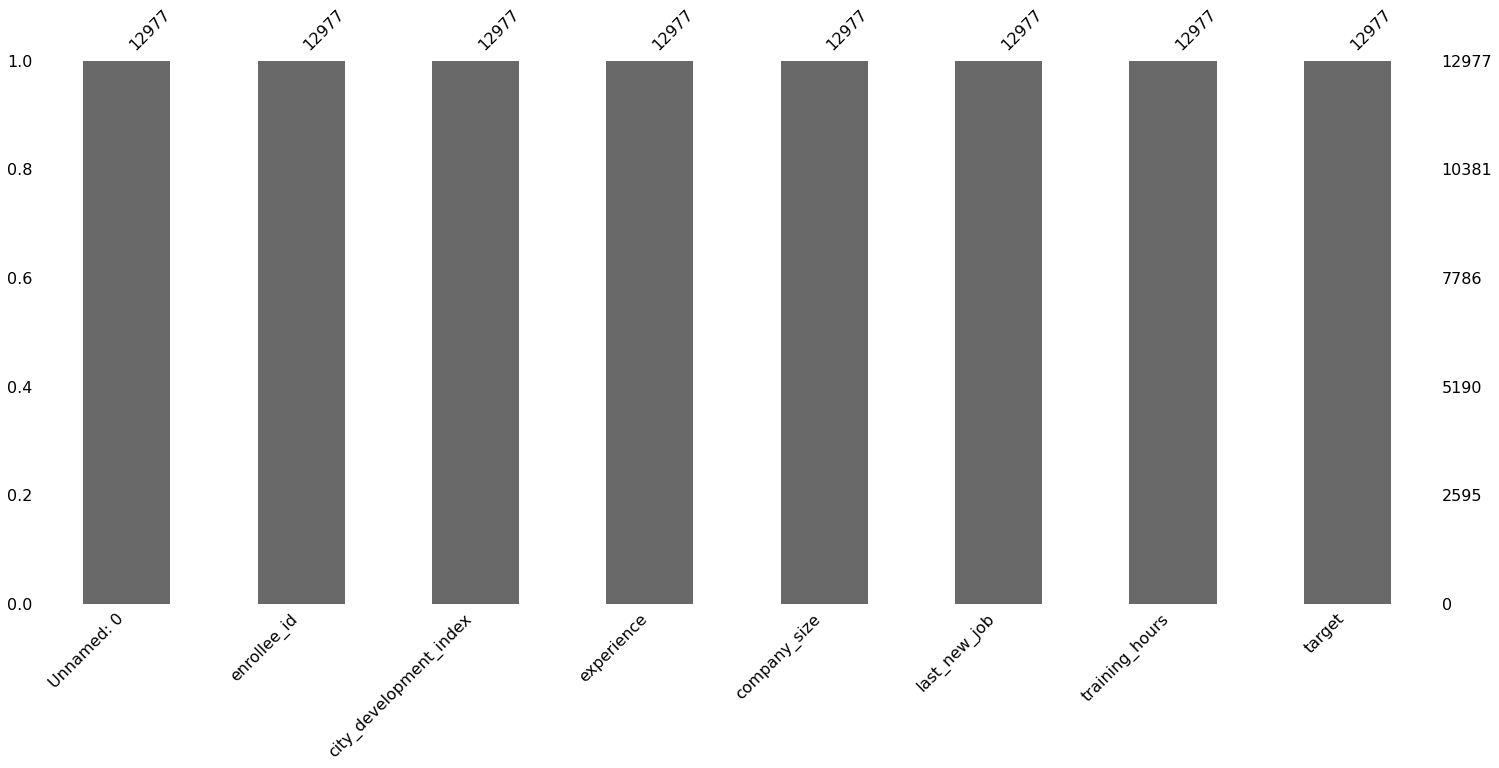

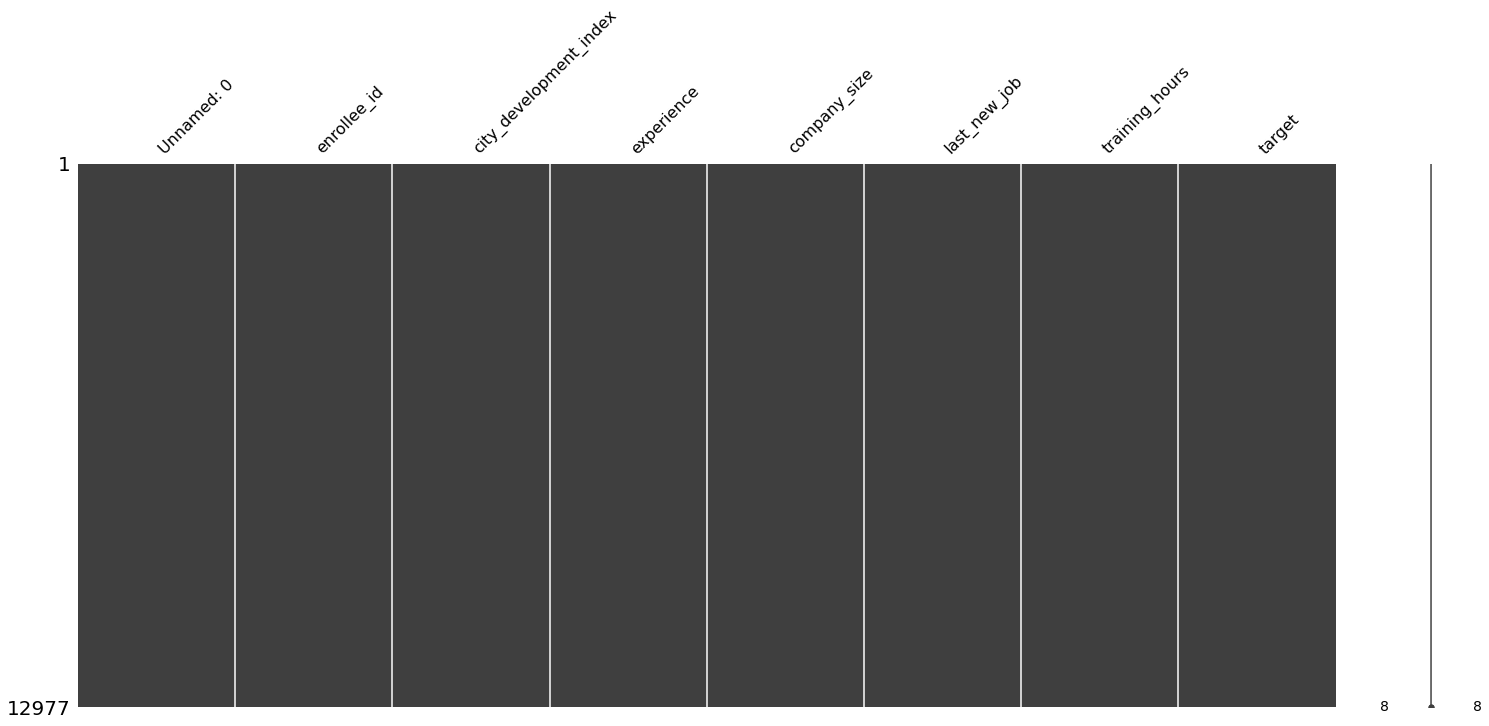

In [4]:
print("Presence of Null Values: "+ str(df.isnull().values.any()))
msno.bar(df)
msno.matrix(df)

## V. Are all the columns numeric such as float or int? If not, please convert them to int before going to the next step.

In [5]:
print(df.dtypes)

Unnamed: 0                  int64
enrollee_id                 int64
city_development_index    float64
experience                  int64
company_size                int64
last_new_job                int64
training_hours              int64
target                    float64
dtype: object


## VI.  plot the heatmap with correlations to get some more idea about the data.

<AxesSubplot:>

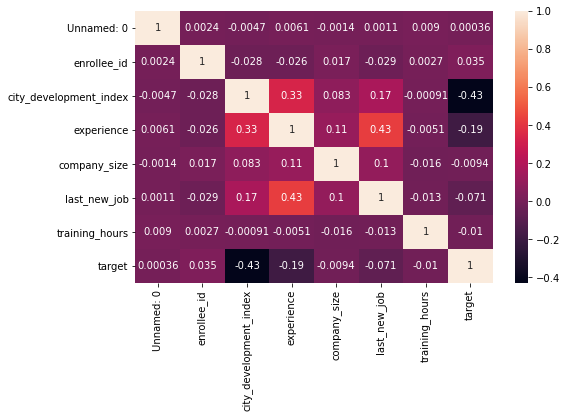

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)

# 2.   Feature Selection and Pre-processing  

## I. Put all the data from the dataframe into X, except the enrolle_id and the target columns

In [7]:
del df['enrollee_id']
X = df.drop('target', axis=1).values
y = df['target'].values

## II. Perform feature scaling on the data of X with StandardScaler and show some sample data from X after scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
print(X_scaled)
#print(np.random.choice(X_scaled, size=(4, 5)))

[[-1.73303209 -0.50342203  0.63395707 -0.5747232   1.69076217 -0.30839586]
 [-1.73249026 -0.57841303  1.54600905 -0.5747232   1.08113696 -0.95180478]
 [-1.73212904  0.69643399 -0.88612956 -0.5747232  -0.74773864 -0.68784215]
 ...
 [ 1.72581169  0.69643399 -0.58211224 -1.0314958  -0.74773864 -0.67134448]
 [ 1.72635352  0.69643399  1.54600905 -0.5747232   1.08113696 -0.35788885]
 [ 1.72653413 -0.28678136 -1.64617288  0.338822   -0.13811344  0.51648738]]


ValueError: a must be 1-dimensional